In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
import numpy as np
import statistics
from datetime import datetime
from scipy.interpolate import interp1d

In [3]:
df2 = pd.read_csv('new_data_log2.csv', sep=',')
df3 = pd.read_csv('new_data_log03.csv', sep=',')
df4 = pd.read_csv('new_data_log04.csv', sep=',')
df5 = pd.read_csv('new_data_log05.csv', sep=',')
df6 = pd.read_csv('new_data_log06.csv', sep=',')
df8 = pd.read_csv('new_data_log08.csv', sep=',')
df9 = pd.read_csv('new_data_log09.csv', sep=',')
df10 = pd.read_csv('new_data_log10.csv', sep=',')
df11 = pd.read_csv('new_data_log11.csv', sep=',')
df12 = pd.read_csv('new_data_log12.csv', sep=',')
df13 = pd.read_csv('new_data_log13.csv', sep=',')
df14 = pd.read_csv('new_data_log14.csv', sep=',')
df16 = pd.read_csv('new_data_log16.csv', sep=',')
df17 = pd.read_csv('new_data_log17.csv', sep=',')

In [4]:
max_list = []

for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    max_list.append(np.max(df['Seconds']))

max_second_time = np.mean(max_list)

print(f'Mean minutes: {(np.mean(max_list)/60):.2f}')
print(f'Mean seconds: {(np.mean(max_list)):.2f}')

Mean minutes: 2.30
Mean seconds: 138.23


In [5]:
filepath = df2

coordinates1 = 256.23816
coordinates2 = 256.23914
target_posZ_values = [coordinates1, coordinates2]

posZ_data = {}

time_values = []

for target_posZ in target_posZ_values:
    nearest_row = filepath.loc[filepath['posZ'] == target_posZ]
    if not nearest_row.empty:
        nearest_time = nearest_row.iloc[0]['Time']
        nearest_time_formatted = '2024-01-01' + nearest_time
        time_values.append(nearest_time_formatted)

max_time = max(time_values)

target_posZ_values = [coordinates1, coordinates2]
nearest_intervals = {}
for target_posZ in target_posZ_values:
    nearest_interval = filepath.loc[filepath['posZ'] == target_posZ, 'Seconds'].values
    nearest_intervals[target_posZ] = nearest_interval
    
for target_posZ, interval in nearest_intervals.items():
    new = []
    new.append(interval)

given_time = max_time

print(given_time)

2024-01-010 days 11:25:22.969000


In [6]:
filepath = df2


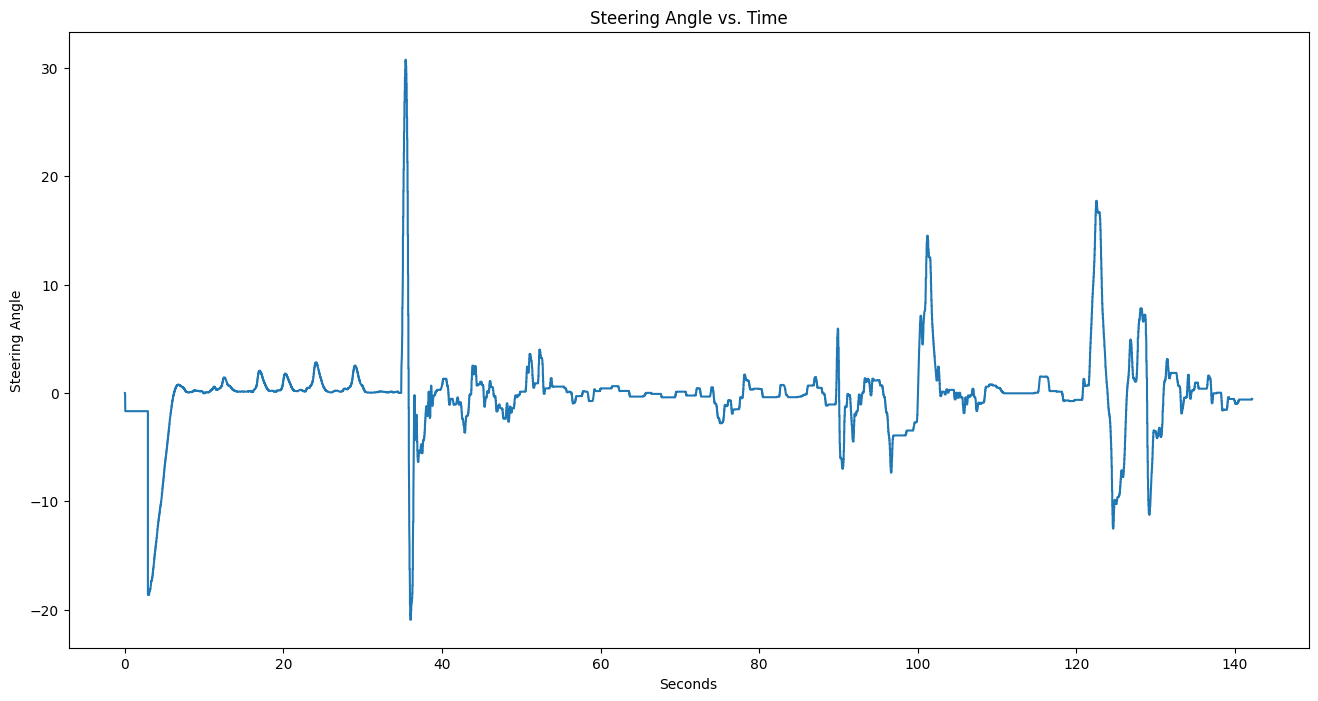

In [7]:
plt.figure(figsize=(16,8))

plt.plot(filepath['Seconds'], filepath['Steering Angle'])

plt.xlabel('Seconds')
plt.ylabel('Steering Angle')
plt.title('Steering Angle vs. Time')
plt.show()

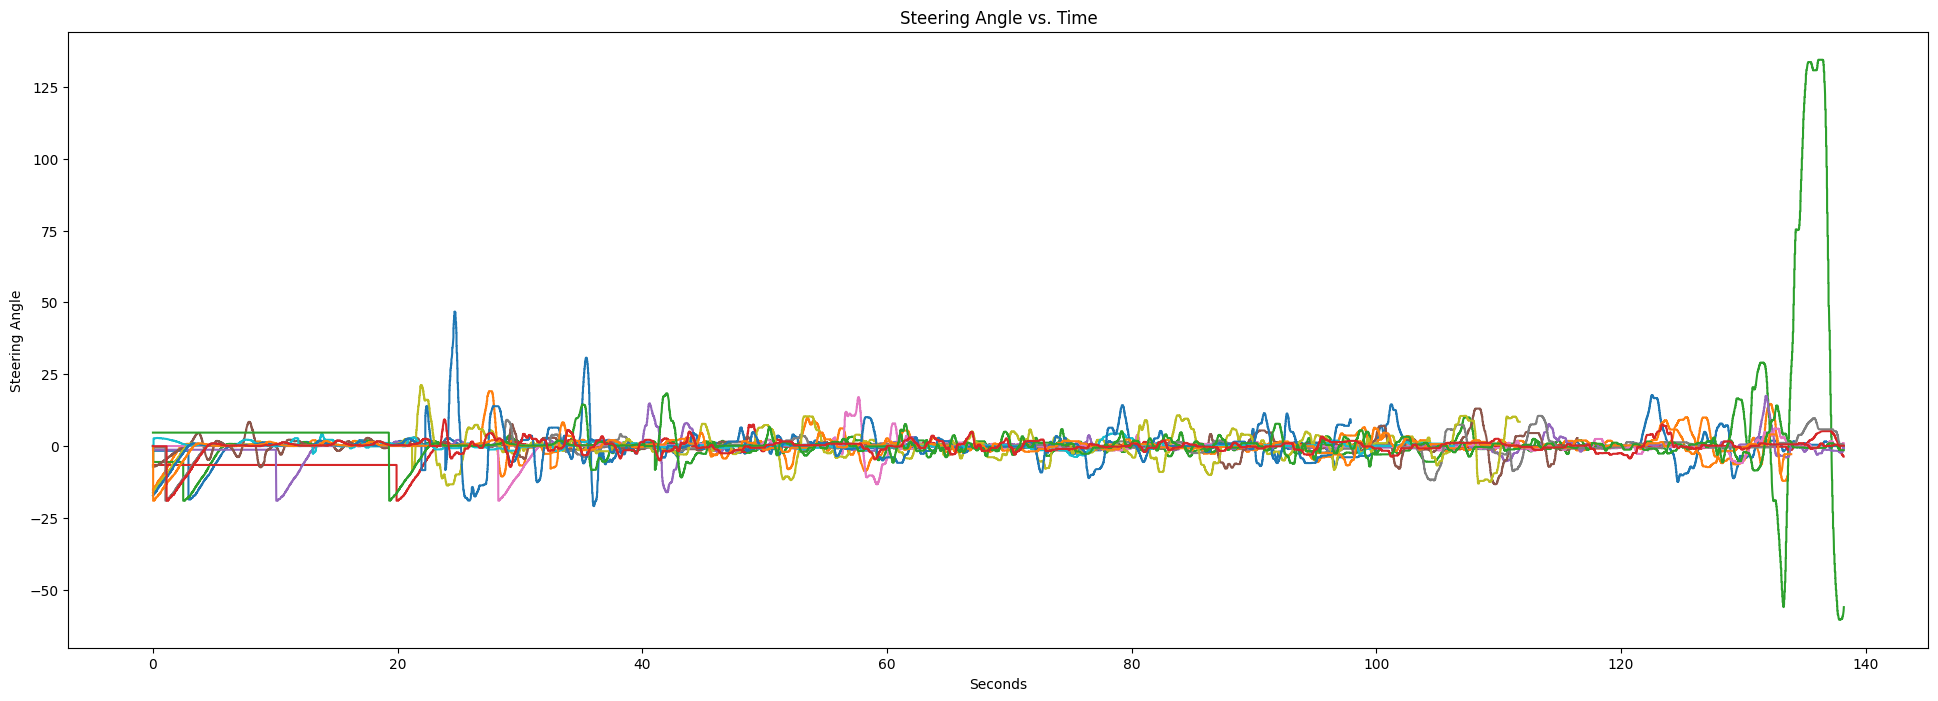

In [20]:
plt.figure(figsize=(24,8))

for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    filtered_df = df[df['Seconds'] <= max_second_time]
    plt.plot(filtered_df['Seconds'], filtered_df['Steering Angle'])

plt.xlabel('Seconds')
plt.ylabel('Steering Angle')
plt.title('Steering Angle vs. Time')
plt.show()

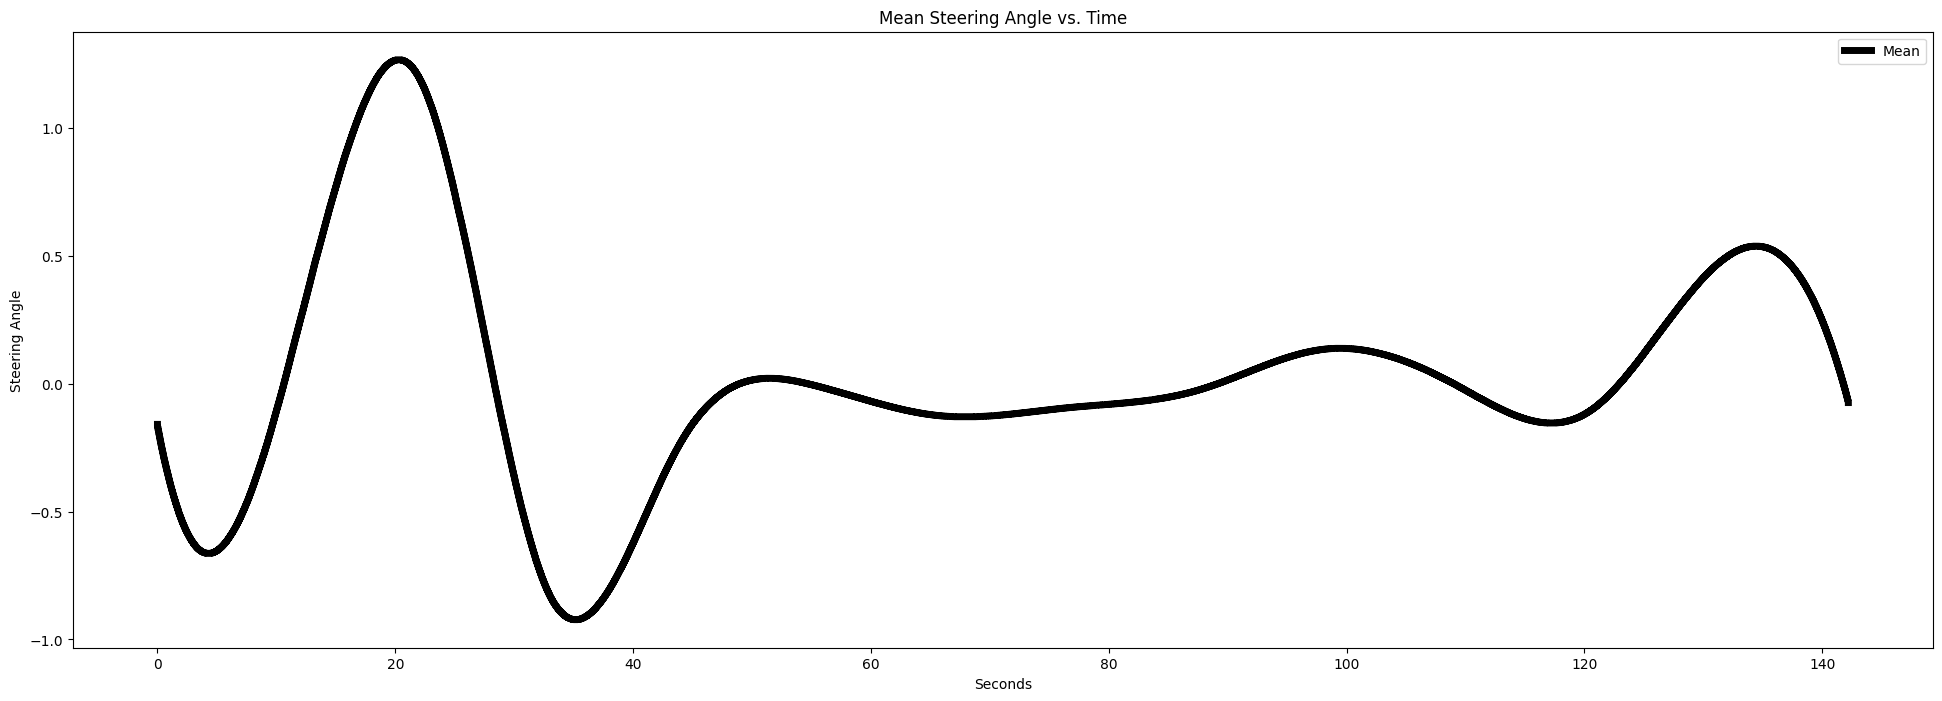

In [16]:
mean_values = []

for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    mean_values.append(df['Steering Angle'].mean())

interpolation_func = interp1d(np.linspace(0, 1, len(mean_values)), mean_values, kind='cubic')
mean_steering_interpolated = interpolation_func(np.linspace(0, 1, len(df2['Seconds'])))

plt.figure(figsize=(24,8))

plt.plot(df2['Seconds'], mean_steering_interpolated, color='black', linestyle='-', label='Mean', linewidth=5)

   
plt.xlabel('Seconds')
plt.ylabel('Steering Angle')
plt.title('Mean Steering Angle vs. Time')
plt.legend()
plt.show()

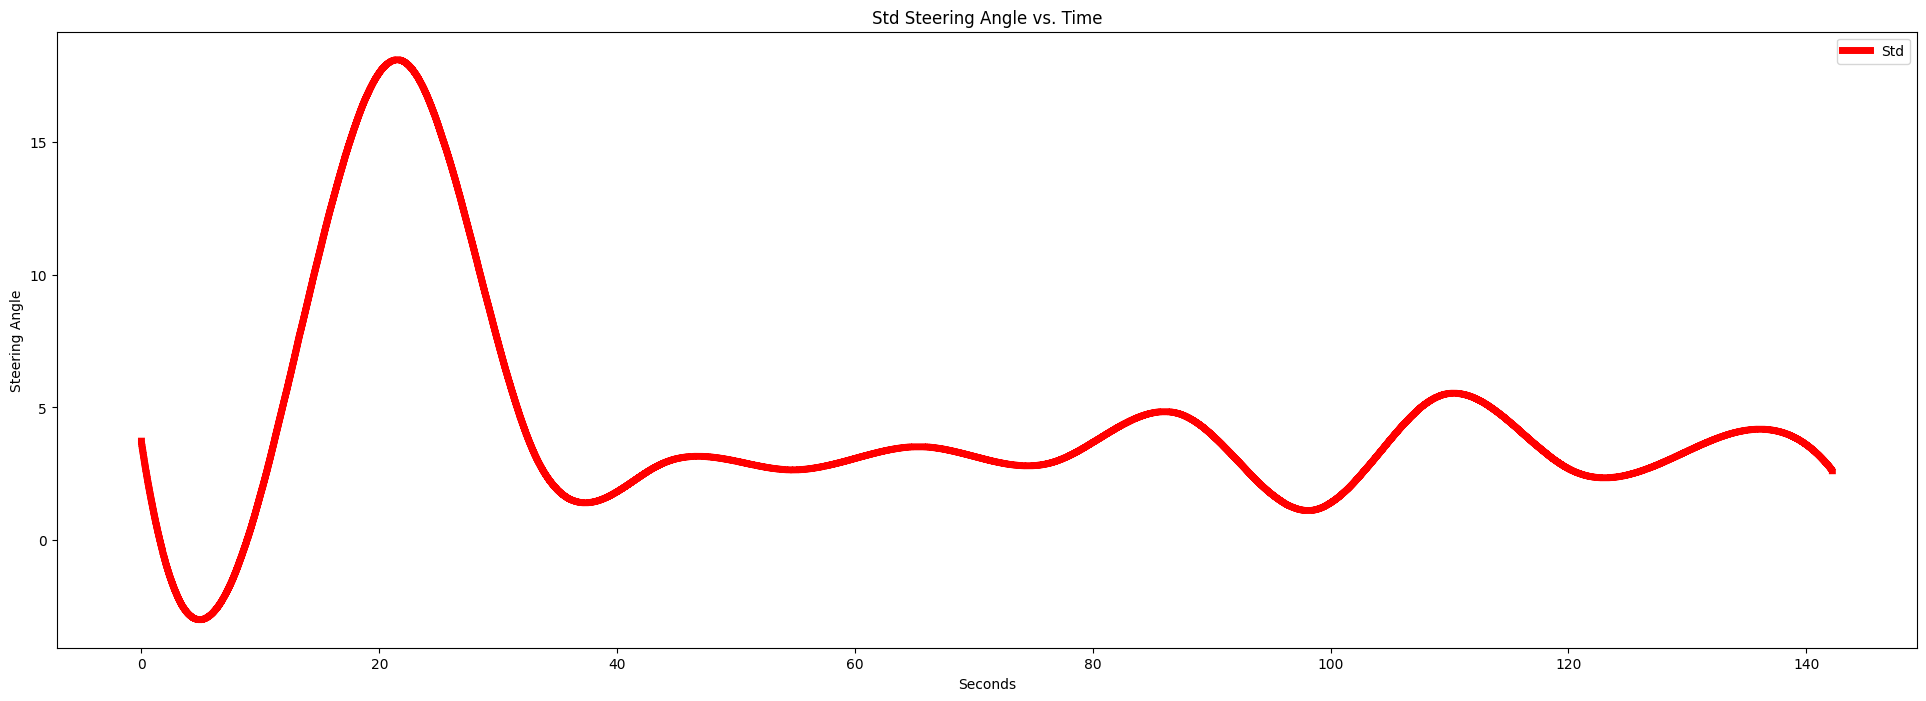

In [17]:
std_values = []

for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    std_values.append(df['Steering Angle'].std())

interpolation_func = interp1d(np.linspace(0, 1, len(std_values)), std_values, kind='cubic')
std_steering_interpolated = interpolation_func(np.linspace(0, 1, len(df2['Seconds'])))

plt.figure(figsize=(24,8))

plt.plot(df2['Seconds'], std_steering_interpolated, color='r', linestyle='-', label='Std', linewidth=5)

   
plt.xlabel('Seconds')
plt.ylabel('Steering Angle')
plt.title('Std Steering Angle vs. Time')
plt.legend()
plt.show()

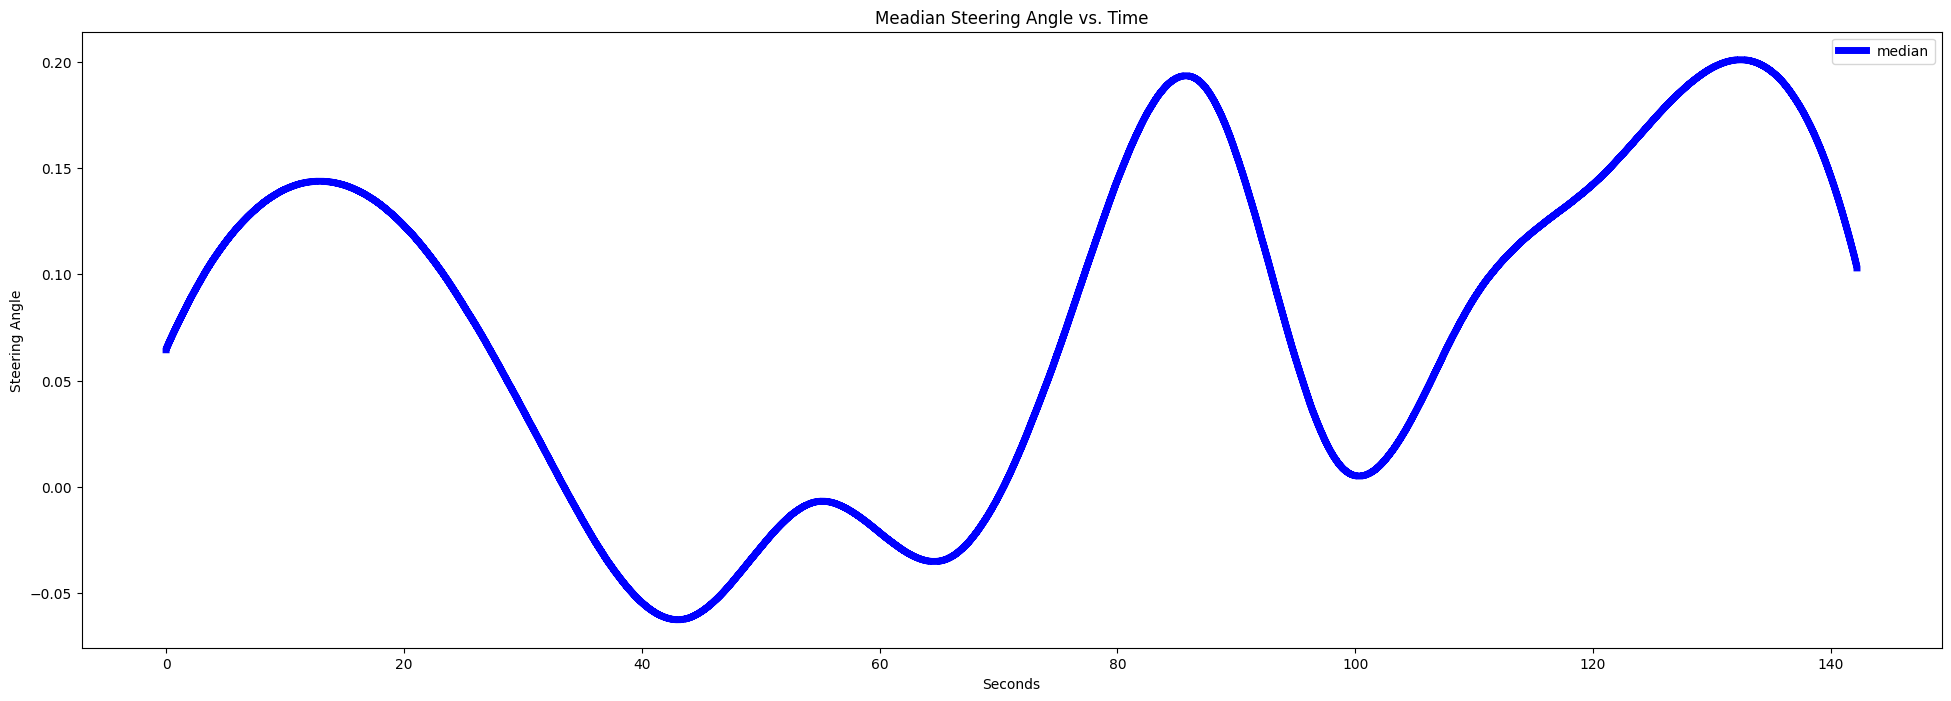

In [18]:
median_values = []

for df in [df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df16, df17]:
    median_values.append(df['Steering Angle'].median())

interpolation_func = interp1d(np.linspace(0, 1, len(median_values)), median_values, kind='cubic')
median_steering_interpolated = interpolation_func(np.linspace(0, 1, len(df2['Seconds'])))

plt.figure(figsize=(24,8))

plt.plot(df2['Seconds'], median_steering_interpolated, color='b', linestyle='-', label='median', linewidth=5)

   
plt.xlabel('Seconds')
plt.ylabel('Steering Angle')
plt.title('Meadian Steering Angle vs. Time')
plt.legend()
plt.show()

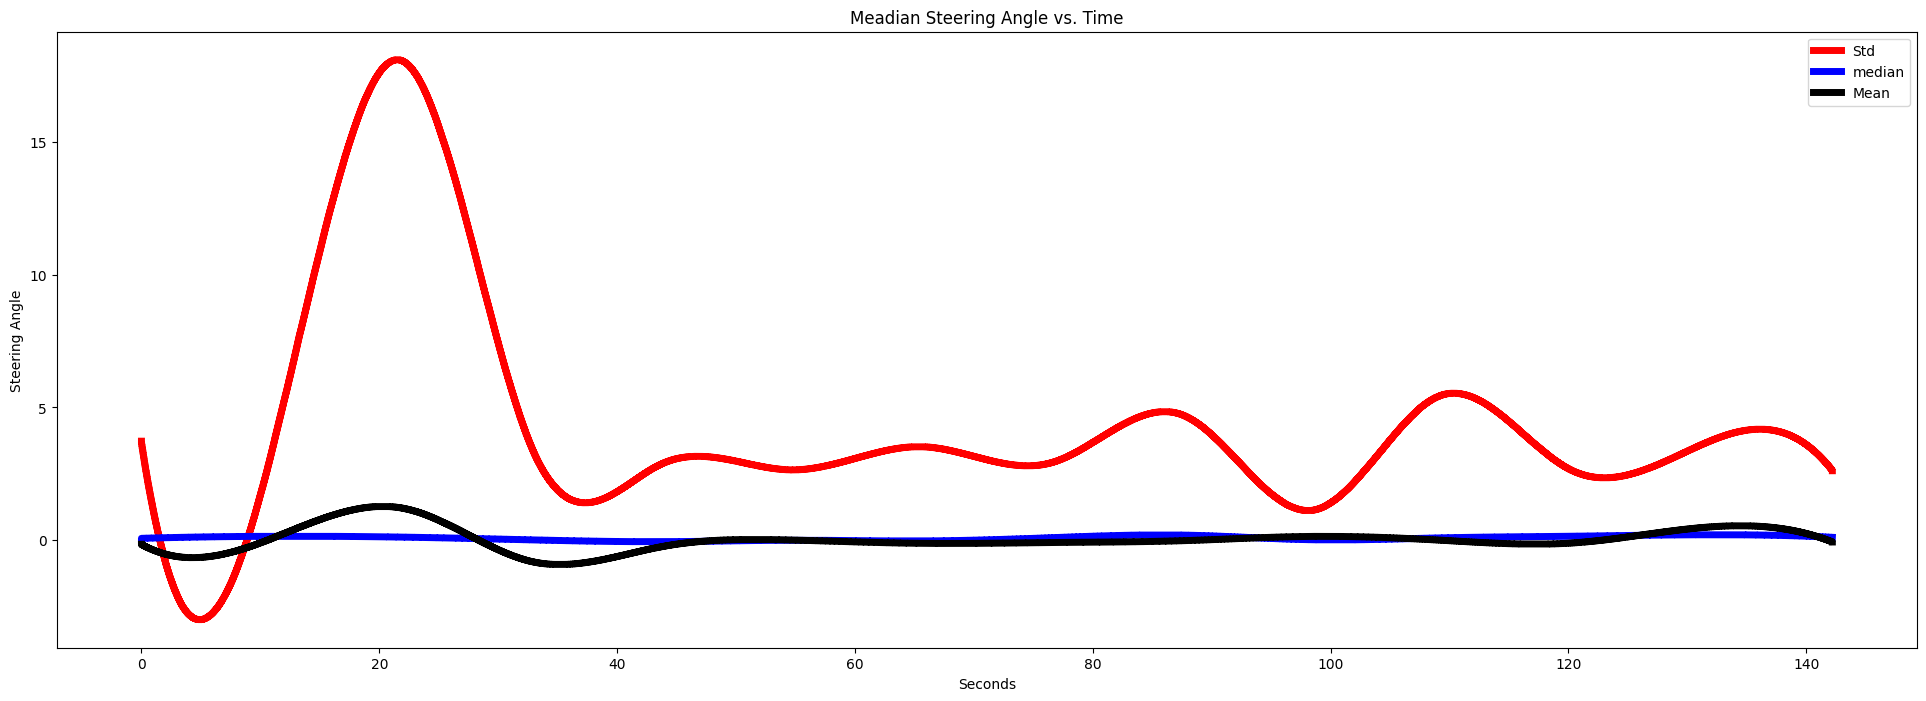

In [19]:
plt.figure(figsize=(24,8))

plt.plot(df2['Seconds'], std_steering_interpolated, color='r', linestyle='-', label='Std', linewidth=5)
plt.plot(df2['Seconds'], median_steering_interpolated, color='b', linestyle='-', label='median', linewidth=5)
plt.plot(df2['Seconds'], mean_steering_interpolated, color='black', linestyle='-', label='Mean', linewidth=5)

   
plt.xlabel('Seconds')
plt.ylabel('Steering Angle')
plt.title('Meadian Steering Angle vs. Time')
plt.legend()
plt.show()